<a href="https://colab.research.google.com/github/santiagofloresm/ENEL645-Team25-FinalProject/blob/davis-cnn/FinalProject-Phase2_Davis-AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Phase 2 - AutoML
## Team 25
Santiago Flores - 30119885

Davis Allan - 10016543

Jordan Joorisity - 30117950

Patrick Pickard - 30116807

Joshua Posyluzny - 30118206

# 1. Loading and pre-processing the dataset

### 1.1 Clone the repository

In [ ]:
!git clone -b davis-cnn https://github.com/santiagofloresm/ENEL645-Team25-FinalProject.git

Cloning into 'ENEL645-Team25-FinalProject'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 156957 (delta 50), reused 14 (delta 5), pack-reused 156860
Receiving objects: 100% (156957/156957), 2.87 GiB | 38.40 MiB/s, done.
Resolving deltas: 100% (241/241), done.
Checking out files: 100% (168577/168577), done.


### 1.2 Install required packages

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git
!pip install autokeras

  Cloning https://github.com/keras-team/keras-tuner.git to /tmp/pip-req-build-t5fvlm1f
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-t5fvlm1f
  Created wheel for keras-tuner: filename=keras_tuner-1.0.3-cp37-none-any.whl size=93792 sha256=3b1f82a031c2bc25187bbe4357beba468597a64e4fa5867748b929104785d021
  Stored in directory: /tmp/pip-ephem-wheel-cache-2l3mdfr5/wheels/33/f9/be/250538026c0381bfee3fe34b533f483c15dbfde8fbb61c8bbd
Successfully built keras-tuner
     |████████████████████████████████| 174kB 8.5MB/s 


### 1.3 Import libraries and set global variables

In [ ]:
import tensorflow as tf
import autokeras as ak
import numpy as np

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_input_dimensions_3d = (200,200,3)
image_input_dimensions_2d = (200,200)
image_height = 200
image_width = 200
batch_size = 32
seed = 32

### 1.4 Mount google drive and unzip previous iteration data

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


#### Unzip previous training data

In [ ]:
!unzip '/content/drive/MyDrive/ENEL 645/autoMLTraining.zip' -d '/'

Archive:  /content/drive/MyDrive/ENEL 645/autoMLTraining.zip
   creating: /content/image_classifier/
   creating: /content/image_classifier/trial_976a47ddf8dd807bd6d45cfb0a30e854/
  inflating: /content/image_classifier/trial_976a47ddf8dd807bd6d45cfb0a30e854/trial.json  
  inflating: /content/image_classifier/trial_976a47ddf8dd807bd6d45cfb0a30e854/pipeline  
   creating: /content/image_classifier/trial_84c5ae919f09106d52645d3a006f2862/
  inflating: /content/image_classifier/trial_84c5ae919f09106d52645d3a006f2862/trial.json  
   creating: /content/image_classifier/trial_84c5ae919f09106d52645d3a006f2862/checkpoints/
   creating: /content/image_classifier/trial_84c5ae919f09106d52645d3a006f2862/checkpoints/epoch_4/
  inflating: /content/image_classifier/trial_84c5ae919f09106d52645d3a006f2862/checkpoints/epoch_4/checkpoint.data-00000-of-00001  
  inflating: /content/image_classifier/trial_84c5ae919f09106d52645d3a006f2862/checkpoints/epoch_4/checkpoint.index  
  inflating: /content/image_clas

### 1.5 Define the paths

In [ ]:
# Old Dataset
train_folder = 'ENEL645-Team25-FinalProject/Dataset/Train'
test_folder = 'ENEL645-Team25-FinalProject/Dataset/Test'
validation_folder = 'ENEL645-Team25-FinalProject/Dataset/Validation'
test_alternative_folder = 'ENEL645-Team25-FinalProject/Dataset/Alternative_Test'

### 1.6 Data display

There are 29 classes in the dataset, one for each letter in the English alphabet, one for space, one for delete and a blank one. Below is an exmaple of each one

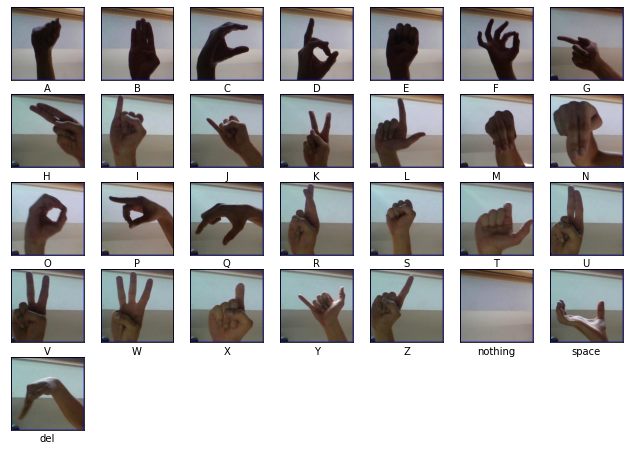

In [ ]:
import matplotlib.pyplot as plt

classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']

plt.figure(figsize=(11,11))
for i in range (0,29):
  plt.subplot(7,7, i+1)
  plt.xticks([])
  plt.yticks([])
  path = train_folder + "/" + classes[i] + "/" + classes[i] + "2.jpg"
  img = plt.imread(path)
  plt.imshow(img)
  plt.xlabel(classes[i])

### 1.7 Load datasets from directories

In [ ]:
train_data = ak.image_dataset_from_directory(
    train_folder,
    seed = seed,
    image_size=(image_height, image_width),
    batch_size=batch_size,
)

Found 69600 files belonging to 29 classes.


In [ ]:
val_data = ak.image_dataset_from_directory(
    validation_folder,
    seed = seed,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 8700 files belonging to 29 classes.


In [ ]:
test_data = ak.image_dataset_from_directory(
    test_alternative_folder,
    seed = seed,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 870 files belonging to 29 classes.


# 2.0 AutoML Model Training

In [12]:
clf = ak.ImageClassifier(max_trials=1)
clf.fit(train_data, validation_data=val_data, epochs=5)

Trial 1 Complete [04h 14m 19s]
val_loss: 0.8028517961502075

Best val_loss So Far: 0.00018456166435498744
Total elapsed time: 04h 14m 19s
INFO:tensorflow:Oracle triggered exit
258080768/258076736 [==============================] - 3s 0us/step
Epoch 1/5
Not enough memory, reduce batch size to 16.
Epoch 1/5
4350/4350 [==============================] - 2953s 679ms/step - loss: 0.3121 - accuracy: 0.9330 - val_loss: 0.0027 - val_accuracy: 0.9999
Epoch 2/5
4350/4350 [==============================] - 2954s 679ms/step - loss: 0.0136 - accuracy: 0.9967 - val_loss: 6.3600e-04 - val_accuracy: 1.0000
Epoch 3/5
4350/4350 [==============================] - 2952s 679ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 7.0158e-04 - val_accuracy: 0.9999
Epoch 4/5
4350/4350 [==============================] - 2950s 678ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 2.0875e-04 - val_accuracy: 1.0000
Epoch 5/5
4350/4350 [==============================] - 2950s 678ms/step - loss: 0.0040 - accuracy: 

In [13]:
results = clf.evaluate(test_data)

In [14]:
model = clf.export_model()
model.save("model_autokeras.h5", save_format="h5")
!cp model_autokeras.h5 '/content/drive/MyDrive/ENEL 645'

### 2.3 Model Summary

In [15]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 200, 200, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 200, 200, 3)       7         
_________________________________________________________________
random_translation (RandomTr (None, 200, 200, 3)       0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 200, 200, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 200, 200, 3)       0         
_________________________________________________________________
random_contrast (RandomContr (None, 200, 200, 3)       0     

# 3 Testing the model and extracting relevant metrics

### 3.1 Accuracy and training history plots

In [17]:
# TODO: update model weights file path variable

print("Best model from 6 trials of AutoML on the alternative test dataset:")
print("Categorical cross-entropy:", round(results[0], 3))
print("Accuracy:", round(results[1]*100, 2),'%')

Best model from 6 trials of AutoML on the alternative test dataset:
Categorical cross-entropy: 0.827
Accuracy: 79.89 %


### 3.2 Classification Report & Confusion Matrix

#### 3.2.1 Function definitions

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import itertools

In [ ]:
# code was acquired from https://www.kaggle.com/danrasband/classifying-images-of-the-asl-alphabet-using-keras

def plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


def plot_confusion_matrix_with_default_options(y_pred, y_true, classes):
    '''Plot a confusion matrix heatmap with a default size and default options.'''
    cm = confusion_matrix(y_true, y_pred)
    with sns.axes_style('ticks'):
        plt.figure(figsize=(12, 12))
        plot_confusion_matrix(cm, classes)
        plt.show()
    return

#### 3.2.2 Resetting the test generators and setting shuffle to False

In [ ]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_directory(test_folder, 
                                                   batch_size=batch_size, 
                                                   seed=seed, 
                                                   target_size=image_input_dimensions_2d, 
                                                   class_mode="categorical")

Found 8700 images belonging to 29 classes.


In [ ]:
alternative_test_generator = test_data_gen.flow_from_directory(test_alternative_folder, 
                                                   batch_size=batch_size, 
                                                   seed=seed, 
                                                   target_size=image_input_dimensions_2d, 
                                                   class_mode="categorical",
                                                   shuffle=False)

Found 870 images belonging to 29 classes.


In [ ]:
test_data = test_data = ak.image_dataset_from_directory(
    test_alternative_folder,
    seed = seed,
    image_size = (image_height, image_width),
    batch_size = batch_size,
)

Found 870 files belonging to 29 classes.


Classification report and confusion matrix for alternate test data

In [ ]:
predictions_alternate_test = clf.predict(test_data)

In [ ]:
y_pred = np.argmax(predictions_alternate_test, axis=1)
y_true = alternative_test_generator.classes
class_labels = list(alternative_test_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           A       0.03      1.00      0.07        30
           B       0.00      0.00      0.00        30
           C       0.00      0.00      0.00        30
           D       0.00      0.00      0.00        30
           E       0.00      0.00      0.00        30
           F       0.00      0.00      0.00        30
           G       0.00      0.00      0.00        30
           H       0.00      0.00      0.00        30
           I       0.00      0.00      0.00        30
           J       0.00      0.00      0.00        30
           K       0.00      0.00      0.00        30
           L       0.00      0.00      0.00        30
           M       0.00      0.00      0.00        30
           N       0.00      0.00      0.00        30
           O       0.00      0.00      0.00        30
           P       0.00      0.00      0.00        30
           Q       0.00      0.00      0.00        30
           R       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization


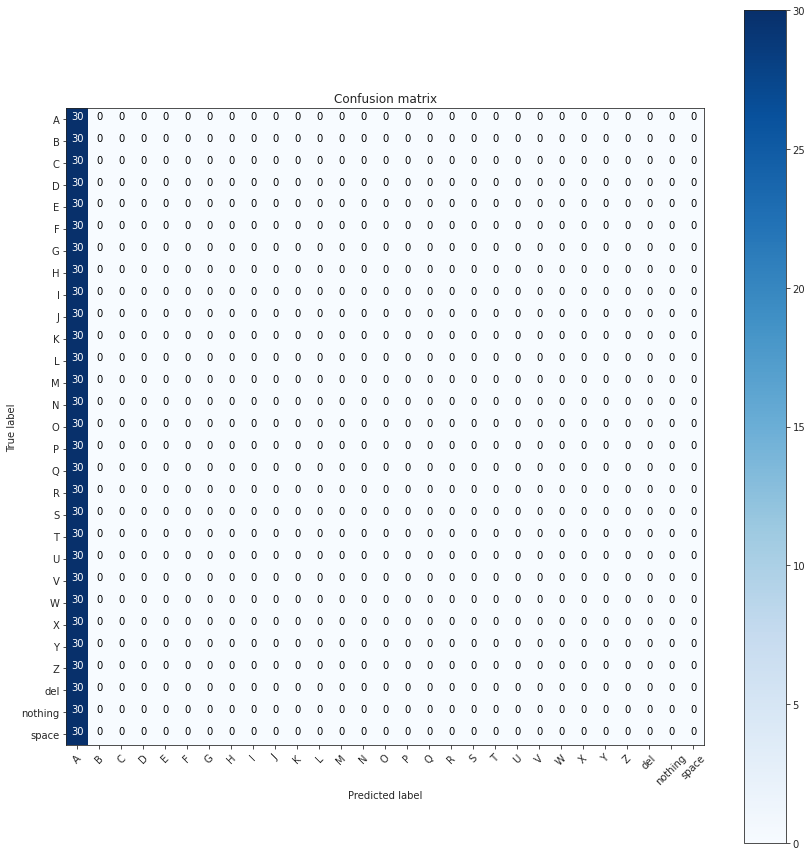

In [ ]:
plot_confusion_matrix_with_default_options(y_pred_alternate, y_true_alternate, class_labels)